## 학습정리

### 5장. 통계
* 통계 : 데이터를 이해하는 바탕이 되는 수리적 기법 
    * 데이터 셋이 작을때는 직접 보여주는 것으로 설명이 가능

#### 5.1 데이터셋 설명하기

* 데이터가 많을 때 통계를 사용해서 중요한 정보만 전달 가능
    * 가장 간단한 통계치  
        * 데이터 포인트의 개수 : len
        * 최댓값 : max 
        * 최솟값 : min
    * 정렬된 리스트의 특정 위치에 있는 값을 구하는 문제로 해석 : sotred
        * min : sorted_value[0]  
        * max : sorted_value[-1]
        
* 중심 경향성(central tendency)
    * 데이터의 중심이 어디 있는지를 나타냄
    * 평균(average) : 총합 / 개수
        * 중앙값보다 계산하기 간편, 데이터가 바뀌어도 값의 변화가 부드러움 : 다양한 미적분 기법을 적용가능
        * 이상치(outlier)에 민감
    * 중앙값(median) : 전체 데이터에서 가장 중앙에 있는 데이터 / 두 데이터의 평균(전체 개수가 짝수인 경우)
        * 중앙값을 찾기 위해서는 주어진 데이터를 정렬 해야함 
        * 가장 큰 데이터가 더 커져도 값은 변하지 않음 : 이상치에 둔감
    * 분위(quantile) : 특정 백분위 보다 낮은 분위에 속하는 데이터 (중앙값을 포괄하는 개념)
    * 최빈값(mode) : 데이터에서 가장 자주 나오는 값 
   
        
* 산포도(dispersion)
    * 데이터가 얼마나 퍼져 있는지를 나타냄
        * 0과 근접할 수록 거의 퍼져있지 않음, 커질수록 많이 퍼져 있다
        * 이상치에 민감하게 반응
            * 안정적인 방법 : 상위 25% - 하위 25%를 사용해 이상치의 영향을 일부 제거 
    * 범위(range) : 가장 큰 값과 작은 값의 차. 산포도를 나타내는 가장 간단한 통계치
        * min,max가 동일한 경우 : 0
        * 범위가 크면 min에 비해 max가 훨씬 크다는 것을 의미 : 데이터가 더 퍼져있다
        * 데이터 전체에 의존하지 않고 min,max에 의해서만 변화
    * 분산(variance) : 편차(데이터에서 평균을 뺀값)의 제곱의 평균
        * 기존 단위의 제곱
    * 표준 편차(standard deviation) : 분산의 제곱근
        * 기존 단위

#### 5.2 상관관계
* 공분산(covariance) : 두 변수가 각각의 평균에서 얼마나 멀리 떨어져 있는지 확인
    * cov(x,y) : x, y 모두 각각의 평균보다 크거나 작은 경우, 양수

#### 5.3 심슨의 역설
#### 5.4 상관관계에 대한 추가적인 경고 사항
#### 5.5 상관관계와 인과관계
#### 5.6 더 공부해 보고 싶다면

## code

In [10]:
from typing import Callable,List,Tuple

In [1]:
import random
import numpy as np
# dataset
num_friends = [ random.randrange(1,100,1) for i in range(100) ]

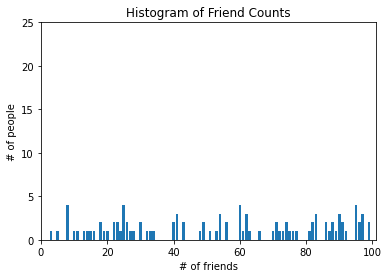

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [9]:
# 평균 
def mean(xs : List[float]) -> float :
    return sum(xs) / len(xs)

mean(num_friends)

54.59

In [13]:
# median 
def _median_odd(xs : List[float]) -> float :
    """len(xs)가 홀수면 중앙값을 반환"""
    return sorted(xs)[len(xs)//2]

def _median_even(xs: List[float]) -> float :
    """len(xs)가 짝수면 두 중앙값의 평균을 반환"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 # e.g length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float :
    """v의 중앙값을 계산"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2


In [17]:
# 분위 

def quantile(xs : List[float], p : float) -> float :
    """x의 p분위에 속하는 값을 반환"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

print (quantile(num_friends, 0.10))
print (quantile(num_friends, 0.25)) 
print (quantile(num_friends, 0.75)) 
print (quantile(num_friends, 0.90)) 


15
26
83
95


In [19]:
# mode
def mode(x: List[float]) -> List[float] :
    """최빈값이 하나보다 많을수 도 있으니 결과를 리스트로 반환"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

print(mode(num_friends))


[95, 8, 60, 25]


In [20]:
# Q3-Q1
def interquartie_range(xs : List[float]) -> float :
    """상위 25% - 하위 25%"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)


In [26]:
# 공분산
def covariance(xs : List[float], ys : List[float]) -> float :
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    
    return np.dot(np.mean(xs), np.mean(ys)) / (len(xs)-1)


In [27]:
covariance([1,2,3,4,5],[10,20,30,40,50])

22.5